# Sentiment Image Classification

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.11.1


# Importing Images and Exploring

In [89]:
# Creating directories to each path in the sentiment folder for test data

train_angry_dir = os.path.join('./sentiment/test/angry')
train_disgust_dir = os.path.join('./sentiment/test/disgust')
train_fear_dir = os.path.join('./sentiment/test/fear')
train_happy_dir = os.path.join('./sentiment/test/happy')
train_neutral_dir = os.path.join('./sentiment/test/neutral')
train_sad_dir = os.path.join('./sentiment/test/sad')
train_surprise_dir = os.path.join('./sentiment/test/surprise')

In [91]:
train_angry_names = os.listdir(train_angry_dir)
train_disgust_names = os.listdir(train_disgust_dir)
train_fear_names = os.listdir(train_fear_dir)
train_happy_names = os.listdir(train_happy_dir)
train_neutral_names = os.listdir(train_neutral_dir)
train_sad_names = os.listdir(train_sad_dir)
train_happy_names = os.listdir(train_neutral_dir)
train_surprise_names = os.listdir(train_surprise_dir)

print(train_angry_names[:10])

['PrivateTest_14565821.jpg', 'PublicTest_65465298.jpg', 'PublicTest_93558553.jpg', 'PublicTest_28963544.jpg', 'PublicTest_90347378.jpg', 'PrivateTest_3309033.jpg', 'PublicTest_19319090.jpg', 'PublicTest_1373732.jpg', 'PrivateTest_89959696.jpg', 'PrivateTest_87526826.jpg']


In [92]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

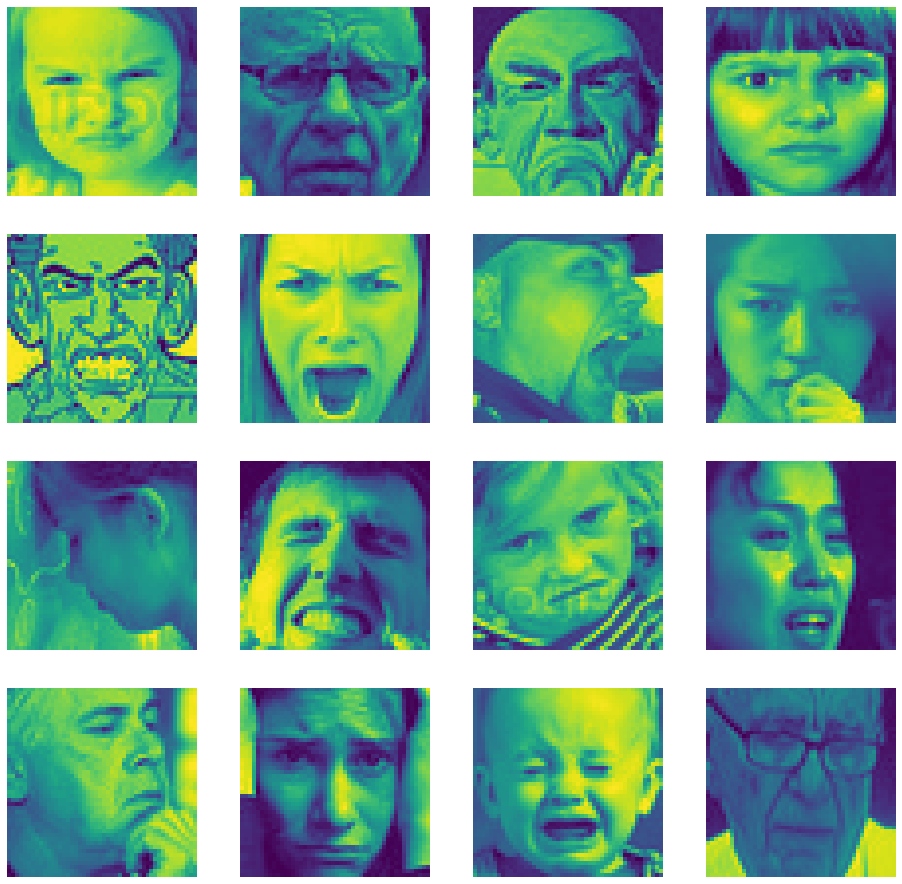

In [97]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_angry_pix = [os.path.join(train_angry_dir, fname) 
                for fname in train_angry_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_angry_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Callback function

In [495]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > .75:
            print("\nReached 75.0% accuracy so cancelling training!")
            self.model.stop_training = True    

# Preprocess Data

In [521]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './sentiment/train',  # This is the source directory for training images
        target_size=(48, 48),  
        batch_size=32,
        color_mode = "grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        './sentiment/test',  # This is the source directory for training images
        target_size=(48, 48),  
        batch_size=32,
        color_mode = "grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Building Small Model

In [522]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 48x48 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dense(7, activation='softmax')
])

In [523]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 23, 23, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_147 (Conv2D)         (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 10, 10, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_148 (Conv2D)         (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 4, 4, 128)      

In [524]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [525]:
callback = myCallback()

history = model.fit(
      train_generator, 
      epochs=10,
      verbose=1,
      validation_data = test_generator,
      callbacks=[callback])

Epoch 1/10
898/898 [==============================] - 46s 51ms/step - loss: 1.8033 - accuracy: 0.2531 - val_loss: 1.6937 - val_accuracy: 0.3093
Epoch 2/10
898/898 [==============================] - 46s 51ms/step - loss: 1.5477 - accuracy: 0.3942 - val_loss: 1.4128 - val_accuracy: 0.4500
Epoch 3/10
898/898 [==============================] - 45s 50ms/step - loss: 1.3727 - accuracy: 0.4714 - val_loss: 1.3178 - val_accuracy: 0.4852
Epoch 4/10
898/898 [==============================] - 45s 50ms/step - loss: 1.2812 - accuracy: 0.5119 - val_loss: 1.2632 - val_accuracy: 0.5124
Epoch 5/10
898/898 [==============================] - 45s 50ms/step - loss: 1.2162 - accuracy: 0.5394 - val_loss: 1.2257 - val_accuracy: 0.5267
Epoch 6/10
898/898 [==============================] - 45s 50ms/step - loss: 1.1640 - accuracy: 0.5597 - val_loss: 1.2170 - val_accuracy: 0.5305
Epoch 7/10
898/898 [==============================] - 46s 51ms/step - loss: 1.1173 - accuracy: 0.5768 - val_loss: 1.1907 - val_accuracy:

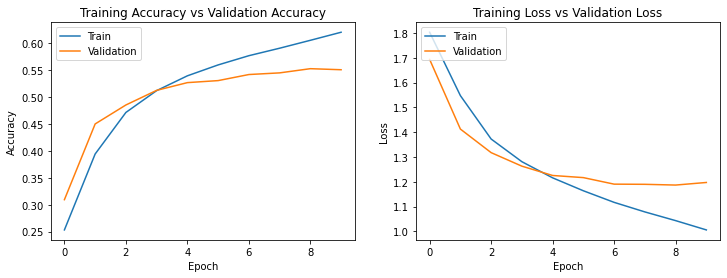

In [526]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

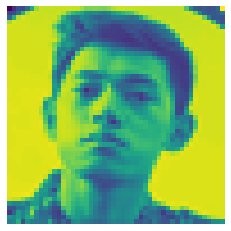

In [605]:
from PIL import Image

# Load and preprocess the new image
new_image = Image.open('./rein-dj/test/rein-test/rein1.png')
new_image = new_image.resize((48, 48))
new_image = new_image.convert('L')
new_image = np.array(new_image) / 255.0
new_image = np.expand_dims(new_image, axis=0)

# Display the image
plt.imshow(new_image[0])
plt.axis('off')
plt.show()

In [606]:
# Use the trained model to predict the output
predictions = model.predict(new_image)

predictions[0]

1/1 [==============================] - 0s 20ms/step


array([0.18711658, 0.00227227, 0.08245216, 0.14258869, 0.34848696,
       0.2339568 , 0.00312662], dtype=float32)

In [607]:
train_generator.class_indices
label_dict = ['angry', 'disgust', 'fear','happy', 'neutral', 'sad', 'surprise']

In [608]:
res = np.argmax(predictions[0])

In [609]:
print('predicted Label for that image is: {}'.format(label_dict[res]))

predicted Label for that image is: neutral
